In [4]:
import numpy as np
import matplotlib.pyplot as mpl

# Simple Example Model

We are supposing that there is an internal discrete state space representing the state of a game being played. The game is either in a state of
* loss = 0
* draw = 1
* win = 2
  
This is the internal state, so who knows what's really going on. The sense information that contributes to understanding the state of the game are coin flips.
* heads = 0
* tails = 1

In [2]:
# Indices of state space - number of 
loss: int = 0
draw: int = 1
win: int = 2

# Indices of observational space
heads: int = 0
tails: int = 1

# Modeling Inputs

We must assume a *prior* distribution for the states of the game, along with a likelihood function that gives us a distribution over observations in each state that we expect to see.

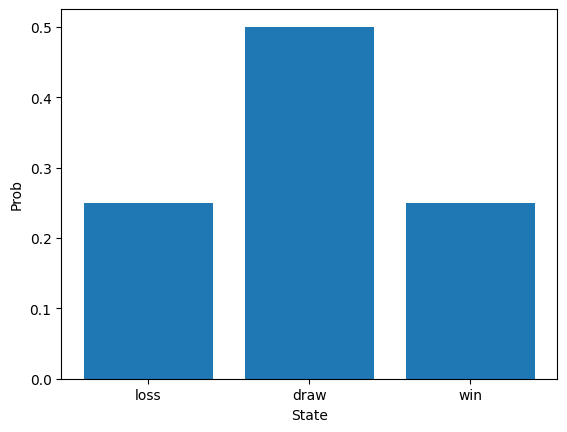

In [9]:
# Assumed probability of each outcome
prior = np.array([0.25, 0.5, 0.25])

# Create the bar graph
mpl.bar(range(len(prior)), prior, tick_label=["loss", "draw", "win"])

# Add labels and title for better understanding (optional)
mpl.xlabel('State')
mpl.ylabel('Prob')

# Display the graph
mpl.show()

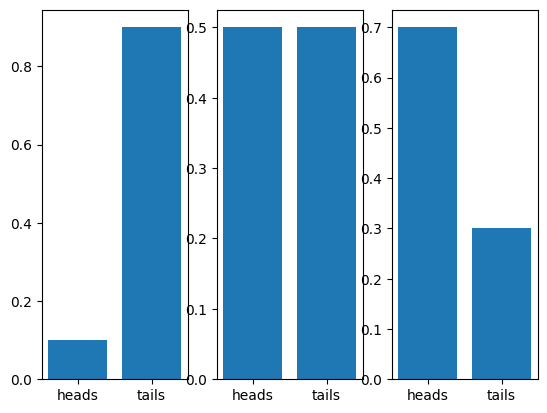

In [27]:
# Effect of each outcome on what coinflip is observed
likelihood = np.array([
    [0.1, 0.9], # given loss 
    [0.5, 0.5], # given draw
    [0.7, 0.3], # given win
])

distros = likelihood.shape[0]
fig, sps = mpl.subplots(1, distros)
for sp, row in zip(sps, likelihood[:]):
    sp.bar(range(len(row)), row, tick_label=["heads", "tails"])

mpl.show()

# Bayesian Outputs

From the above *prior* and *likelihood* functions, *evidence* and *posteriori* functions can be derived.

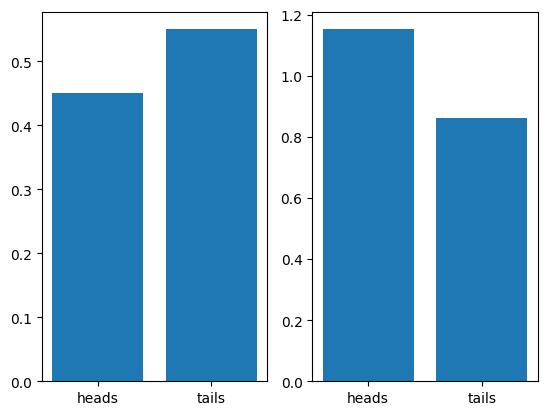

In [26]:
# Joint
joint = likelihood * prior.reshape(3, 1)

# Model evidence
evidence = joint.sum(axis=0, keepdims=True)

# Surprise
surprise = -np.log2(evidence)

# Create the bar graph
fig, (ax1, ax2) = mpl.subplots(1, 2)
ax1.bar(range(len(evidence[0])), evidence[0], tick_label=["heads", "tails"])
ax2.bar(range(len(surprise[0])), surprise[0], tick_label=["heads", "tails"])
mpl.show()

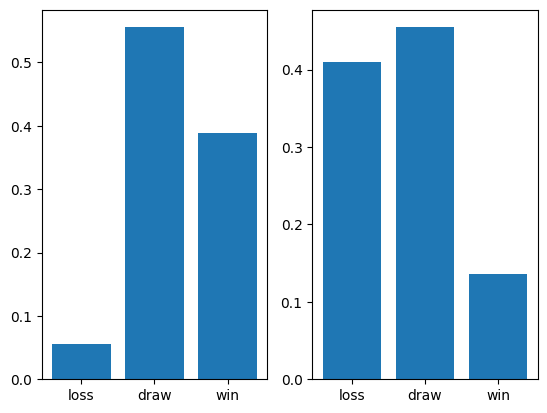

In [31]:
# Posteriori
post = (joint / evidence).transpose()

distros = post.shape[0]
fig, sps = mpl.subplots(1, distros)
for sp, row in zip(sps, post[:]):
    sp.bar(range(len(row)), row, tick_label=["loss", "draw", "win"])

mpl.show()

[[0.05555556 0.55555556 0.38888889]
 [0.40909091 0.45454545 0.13636364]]
[[0.25 0.5  0.25]]


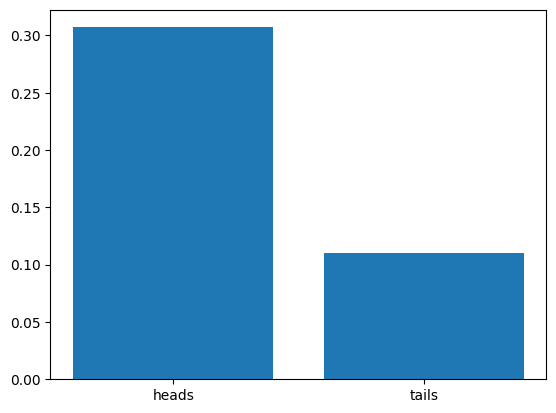

In [41]:
# Bayesian Surprise

print(post)
print(prior.reshape(1, 3))
b_surprise = (prior * (np.log2(prior) - np.log2(post))).sum(axis=1)

mpl.bar(range(len(b_surprise)), b_surprise, tick_label=["heads", "tails"])
mpl.show()